# Linear regression

## Libraries and settings

In [71]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\DA_HS2023\data_analytics\Week_08


## Import the apartment data

In [72]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [73]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
362     75
369     90
496    100
349     94
308     94
Name: area, dtype: int64 

y_train:
362    1840
369    1570
496    1941
349    2480
308    2800
Name: price, dtype: int64


### Fit the simple linear regression model

In [74]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1191.96
Slope of regression line (beta):          12.326
p-value:                                  0.0000
R-squared (coefficient of determination): 0.2711


### Plot regression line

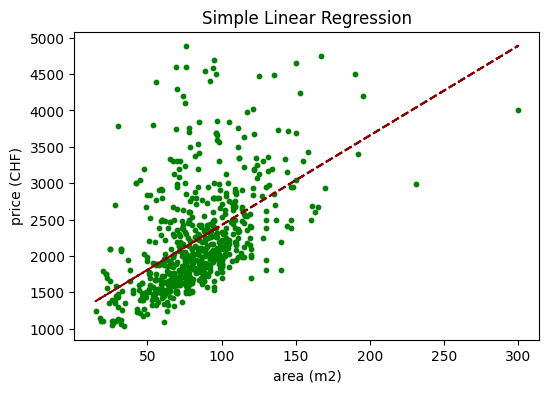

In [75]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [76]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2116.38
1st Observed price in dataset: 3180.00
1st Residual price in dataset: 1063.62


### Plot histogram of residuals

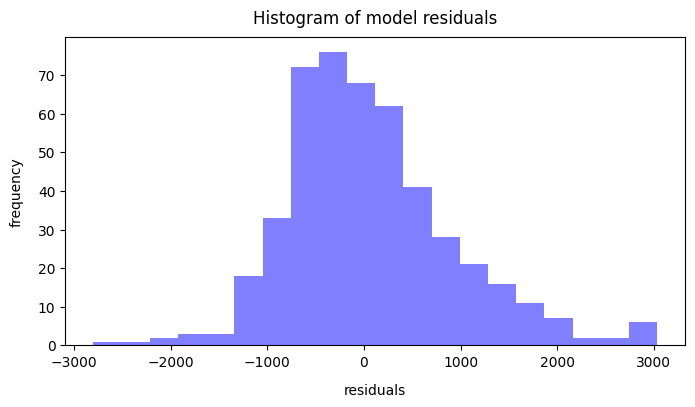

In [77]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [78]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 2370.0, Predicted price: 1980.8
Observed price: 2300.0, Predicted price: 2424.5
Observed price: 4290.0, Predicted price: 2843.6
Observed price: 2480.0, Predicted price: 2880.6
Observed price: 2032.0, Predicted price: 2116.4
Observed price: 2090.0, Predicted price: 2005.5
Observed price: 1790.0, Predicted price: 2350.6
Observed price: 2280.0, Predicted price: 2535.5
Observed price: 2350.0, Predicted price: 2671.0
Observed price: 1600.0, Predicted price: 2375.2


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [79]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens
362    75  1662.597326
369    90  1662.597326
496   100  1327.635328
349    94  1662.597326
308    94  1662.597326 

y2_train:
362    1840
369    1570
496    1941
349    2480
308    2800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [80]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     398.6
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          3.66e-113
Time:                        08:17:24   Log-Likelihood:                -4883.0
No. Observations:                 643   AIC:                             9772.
Df Residuals:                     640   BIC:                             9785.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        458.4991     65.979      6.949      0.0

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

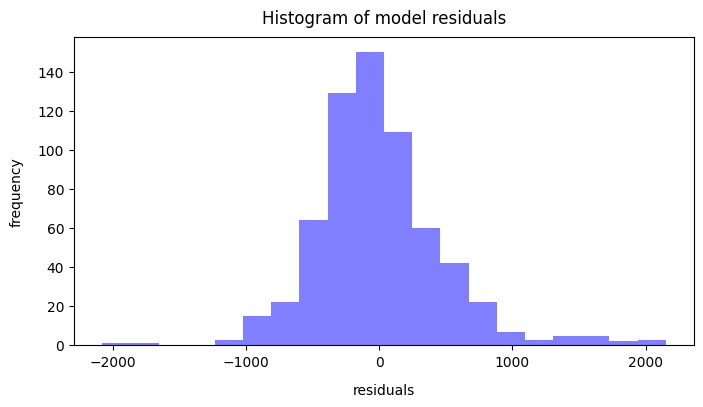

In [85]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [82]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 2370.0, Predicted price: 2558.8
Observed price: 2300.0, Predicted price: 2210.8
Observed price: 4290.0, Predicted price: 3611.3
Observed price: 2480.0, Predicted price: 2834.7
Observed price: 2032.0, Predicted price: 1888.1
Observed price: 2090.0, Predicted price: 1619.6
Observed price: 1790.0, Predicted price: 1975.8
Observed price: 2280.0, Predicted price: 2493.3
Observed price: 2350.0, Predicted price: 2504.8
Observed price: 1600.0, Predicted price: 2213.7


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [83]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-08-24 08:17:24
Python Version: 3.10.12
-----------------------------------
